<a href="https://colab.research.google.com/github/Akramkhan01/Capstone-Project-Play-Store-App-Review-Analysis/blob/main/EDA_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [173]:
import numpy as  np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [174]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [175]:
google_data = pd.read_csv('/content/drive/MyDrive/Play Store App Review Analysis - Akram Khan/Play Store Data.csv')

#user_reviews= pd.read_csv('/content/drive/MyDrive/Capstone Project/User Reviews.csv')

In [176]:
type(google_data)

pandas.core.frame.DataFrame

In [177]:
google_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [178]:
google_data.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [179]:
google_data.shape

(10841, 13)

In [180]:
google_data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


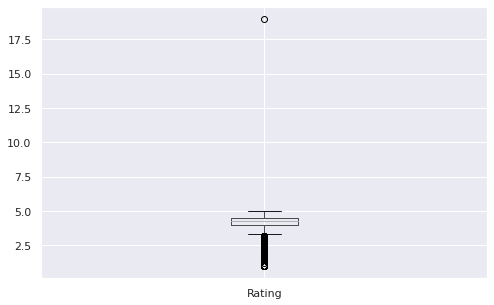

In [181]:
google_data.boxplot()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



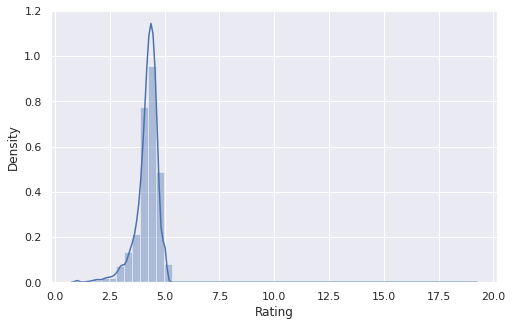

In [182]:
sns.set(rc={'figure.figsize':(8,5)});
sns.distplot(google_data.Rating);

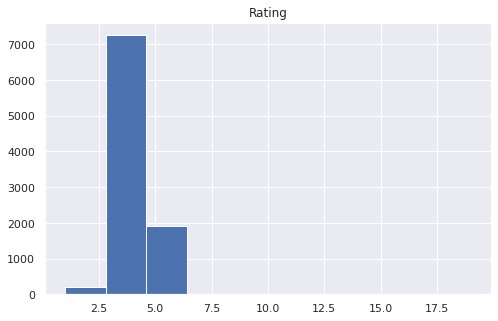

In [183]:
google_data.hist();

#**DATA CLEANING**

In [184]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [185]:
#Find the Null value
#google_data.isnull()

In [186]:
#Count the number of missing value in each column
google_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

#**Checking how many outliers are there** 

In [187]:
#Check how many rating are more than 5 outlier
google_data[google_data.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [188]:
google_data.drop([10472], inplace=True)

In [189]:
#google_data[10470:10475]

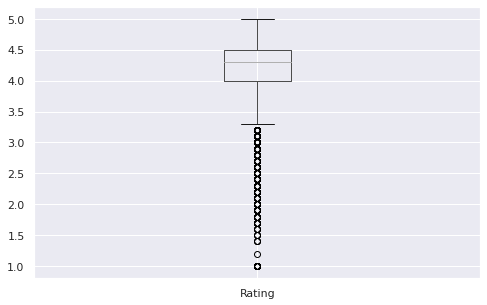

In [190]:
google_data.boxplot();

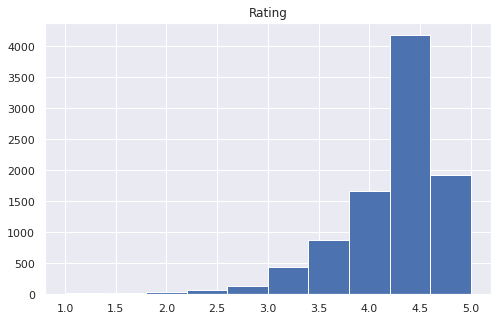

In [191]:
google_data.hist();

#**Data Manipulation**

In [192]:
#Fill the null values with median
google_data['Rating'].fillna(google_data['Rating'].median(), inplace=True)

In [193]:
#Count the number of null values in each column
print(google_data.isnull().sum())

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64


In [194]:
#Mode of Categorical values
print(google_data['Type'].mode())
print(google_data['Current Ver'].mode())
print(google_data['Android Ver'].mode())


0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object


In [195]:
#Fill the missing categorical values with mode
google_data['Type'].fillna(str(google_data['Type'].mode().values[0]),inplace=True)
google_data['Current Ver'].fillna(str(google_data['Current Ver'].mode().values[0]),inplace=True)
google_data['Android Ver'].fillna(str(google_data['Android Ver'].mode().values[0]),inplace=True)

In [196]:
#Count the number of null values in each column
google_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

#**Checking, if the dataframe contains any duplicate values for the same App name**

In [197]:
boolean = google_data['App'].duplicated().any()
boolean

True

In [198]:
google_data['App'].value_counts()

ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
Candy Crush Saga                                     7
8 Ball Pool                                          7
ESPN                                                 7
                                                    ..
Kawaii Easy Drawing : How to draw Step by Step       1
GALAK-Z: Variant Mobile                              1
DG Surveyor                                          1
Portable Wi-Fi hotspot                               1
CB Mobile GA                                         1
Name: App, Length: 9659, dtype: int64

#**As we can see from the above mentioned data, some of the apps are having multiple rows. Let's check out if there data is identical or not**

In [199]:
google_data[google_data['App']=='ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


#**As we can see from the above dataframe, ROBLOX app is having identical rows with difference in number of reviews. It may have happened that for the same app, the data has been scraped in different points of time. So we have kept row of an app with maximum number of reviews, assuming it to be the latest one.**

In [200]:
google_data.drop_duplicates(subset='App',inplace=True)

In [201]:
#boolean = google_data['App'].duplicated().any()
#boolean

In [202]:
google_data['App'].value_counts()

Whist - Tinnitus Relief                      1
Titanic App - Feminist Dating Application    1
ER Blood Draw Doctor & Surgeon               1
I am Rich Person                             1
Arrow.io                                     1
                                            ..
U.S. Bank                                    1
Ek-yatri: Travel where you Belong            1
EXO-L                                        1
Guardian Hunter: SuperBrawlRPG               1
CB Mobile GA                                 1
Name: App, Length: 9659, dtype: int64

In [203]:
google_data[google_data['App']=='ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


In [204]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          9659 non-null   float64
 3   Reviews         9659 non-null   object 
 4   Size            9659 non-null   object 
 5   Installs        9659 non-null   object 
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9659 non-null   object 
 12  Android Ver     9659 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


In [205]:
google_data[google_data['Reviews'] =='3.0M']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [206]:
google_data['Reviews'] = google_data.Reviews.replace("0.0",0)
google_data['Reviews'] = google_data.Reviews.replace("3.0M",3000000.0)
google_data['Reviews'] = google_data['Reviews'].astype(float)
google_data['Reviews'].dtype

dtype('float64')

In [207]:
google_data['Size'].max(),google_data['Size'].min()

('Varies with device', '1.0M')

In [208]:
google_data['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [209]:
google_data['Size'] =google_data.Size.replace("Varies with device",np.nan)
google_data['Size'] =google_data.Size.str.replace("M","000")

In [210]:
google_data['Size'] =google_data.Size.replace("Varies with device",np.nan)
google_data['Size'] =google_data.Size.str.replace("M","000") # All size values became the kilobyte type.
google_data['Size'] =google_data.Size.str.replace("k","")
google_data['Size'] = google_data.Size.replace("1,000+",1000)
google_data['Size'] =google_data['Size'].astype(float)
google_data['Size'].dtype

dtype('float64')

In [211]:
google_data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [212]:
google_data['Installs'] = google_data.Installs.str.replace(",","")
google_data['Installs'] =google_data.Installs.str.replace("+","")
google_data['Installs'] = google_data.Installs.replace("Free",np.nan)
google_data['Installs'] = google_data['Installs'].astype(float)
google_data['Installs'].dtype

dtype('float64')

In [213]:
google_data['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [214]:
#Convert price into Numerical values
google_data['Price'] = google_data.Price.replace("Everyone",np.nan)
google_data['Price'] = google_data.Price.str.replace("$","").astype(float)
google_data['Price'].dtype

dtype('float64')

**Last Updated**

In [215]:
google_data['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

 **Data type of Last Uptated is object. I converted from string to date type.** 

In [216]:
google_data['Last Updated'] = pd.to_datetime(google_data['Last Updated'])
google_data['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 9659, dtype: datetime64[ns]

In [217]:
google_data.isnull().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size              1227
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

In [218]:
print(google_data['Size'].mean())

18372.195837286545


In [219]:
google_data['Size'].fillna(str(google_data['Size'].mean()),inplace=True)

In [220]:
google_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

**User Reviews**

In [221]:
user_reviews= pd.read_csv('/content/drive/MyDrive/Play Store App Review Analysis - Akram Khan/User Reviews.csv')

In [222]:
user_reviews.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [223]:
user_reviews.shape

(64295, 5)

In [224]:
user_reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [225]:
user_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


**Merged Dataset**

In [226]:
merged_df=pd.merge(google_data,user_reviews,on='App')
merged_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,NaN,NaN,NaN,NaN
4,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61551,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941.0,18372.195837286545,10000000.0,Free,0.0,Everyone,Photography,2018-08-06,Varies with device,Varies with device,NaN,NaN,NaN,NaN
61552,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941.0,18372.195837286545,10000000.0,Free,0.0,Everyone,Photography,2018-08-06,Varies with device,Varies with device,NaN,NaN,NaN,NaN
61553,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941.0,18372.195837286545,10000000.0,Free,0.0,Everyone,Photography,2018-08-06,Varies with device,Varies with device,Too much ads,Positive,0.200,0.200000
61554,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941.0,18372.195837286545,10000000.0,Free,0.0,Everyone,Photography,2018-08-06,Varies with device,Varies with device,Just allow time ...,Neutral,0.000,0.000000


In [227]:
#Checking null values
merged_df.isnull().sum()

App                           0
Category                      0
Rating                        0
Reviews                       0
Size                          0
Installs                      0
Type                          0
Price                         0
Content Rating                0
Genres                        0
Last Updated                  0
Current Ver                   0
Android Ver                   0
Translated_Review         25627
Sentiment                 25622
Sentiment_Polarity        25622
Sentiment_Subjectivity    25622
dtype: int64

In [228]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61556 entries, 0 to 61555
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   App                     61556 non-null  object        
 1   Category                61556 non-null  object        
 2   Rating                  61556 non-null  float64       
 3   Reviews                 61556 non-null  float64       
 4   Size                    61556 non-null  object        
 5   Installs                61556 non-null  float64       
 6   Type                    61556 non-null  object        
 7   Price                   61556 non-null  float64       
 8   Content Rating          61556 non-null  object        
 9   Genres                  61556 non-null  object        
 10  Last Updated            61556 non-null  datetime64[ns]
 11  Current Ver             61556 non-null  object        
 12  Android Ver             61556 non-null  object

In [229]:
merged_df.dropna(inplace=True)


In [230]:
merged_df.isnull().sum()

App                       0
Category                  0
Rating                    0
Reviews                   0
Size                      0
Installs                  0
Type                      0
Price                     0
Content Rating            0
Genres                    0
Last Updated              0
Current Ver               0
Android Ver               0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

# **DATA VISUALIZATION**

# What are the top 30 apps present in the google play store as per their Genres?

In [231]:
top_genres = google_data.Genres.value_counts().reset_index().rename(columns={'Genres':'Count','index':'Genres'})
genres_installs = google_data.groupby(['Genres'])[['Installs']].sum()

In [232]:
top_genres_installs = pd.merge(top_genres, genres_installs, on='Genres')
top_30_genres_installs = top_genres_installs.sort_values('Count',ascending=False)[0:30]


In [233]:
top_30_genres_installed = top_genres_installs.sort_values('Installs',ascending=False)[0:30]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



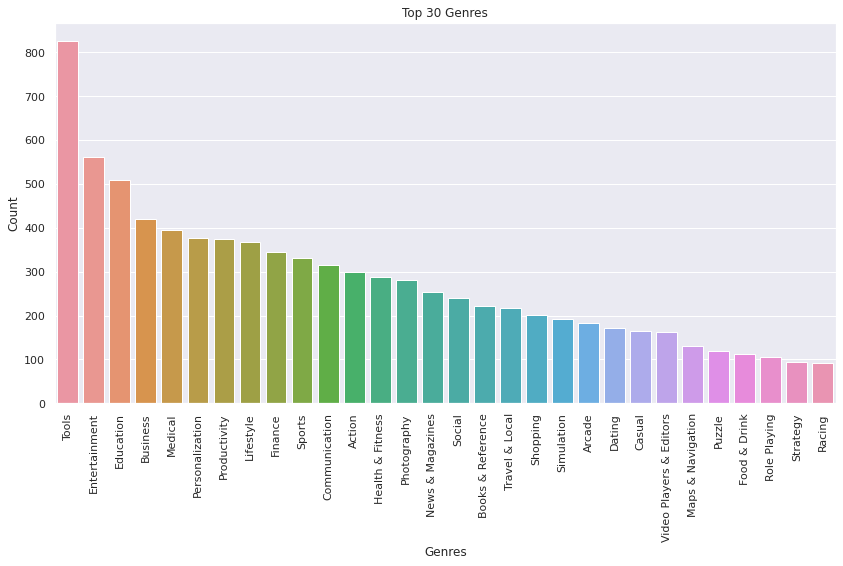

In [234]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Genres")
plt.ylabel("Number of application")
plt.title("Top 30 Genres")
sns.barplot(top_30_genres_installs.Genres, top_30_genres_installs.Count)
plt.show()


# Which are the Genres that are getting installed the most in top 20 Genres?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



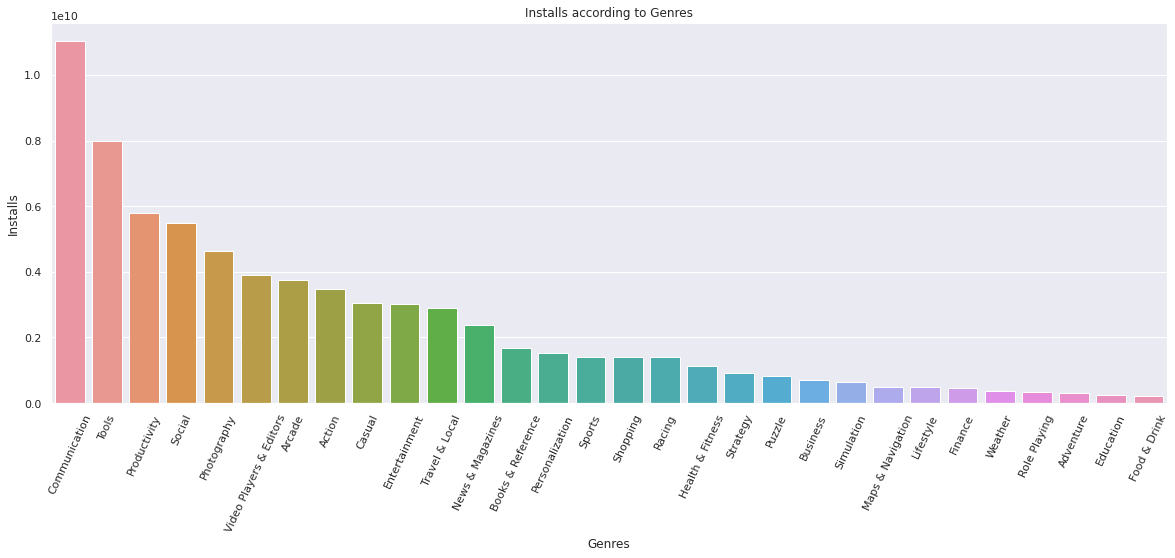

In [235]:
plt.figure(figsize=(20,7))
plt.xticks(rotation=65)
plt.xlabel("Genres")
plt.ylabel("Installs")
plt.title("Installs according to Genres")
sns.barplot(top_30_genres_installed.Genres, top_30_genres_installed.Installs)
plt.show()

# As we can see from the above two plots: Maxinum number of apps present in google play store comes under Tools, Entertainment and Education Genres but as per the installation and requirement in the market plot, scenario is not the same. Maximum installed apps comes under Communication, Tools and Productivity Genres.

#Which category of Apps from the ‘Content Rating’ column is found more on the play store?**

In [236]:
x2 = google_data['Content Rating'].value_counts().index
y2 = google_data['Content Rating'].value_counts()

x2sis = []
y2sis = []
for i in range(len(x2)):
    x2sis.append(x2[i])
    y2sis.append(y2[i])

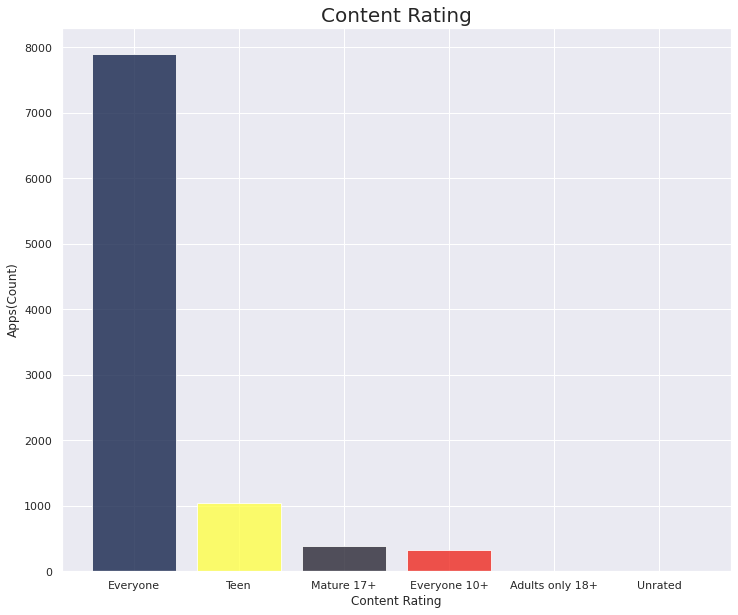

In [237]:
plt.figure(figsize=(12,10))
plt.bar(x2sis,y2sis,width=0.8,color=['#15244C','#FFFF48','#292734','#EF2920','#CD202D','#ECC5F2'], alpha=0.8);
plt.title('Content Rating',size = 20);
plt.ylabel('Apps(Count)');
plt.xlabel('Content Rating');

# Looks like 80% of Apps targeted for evryone.

# Does sentiment_subjectivity proportional to sentiment_polarity?

In [238]:
sentimet_subjectivity_polarity = merged_df.groupby(['Category'])['Sentiment_Polarity','Sentiment_Subjectivity'].mean().reset_index().rename(columns={'Sentiment_Polarity':'Sentiment_polarity_avg','Sentiment_Subjectivity':'sentiment_subjectivity_avg'})

merged_df['Sentiment_Subjectivity'] = merged_df['Sentiment_Subjectivity'].abs()
merged_df['Sentiment_Polarity'] = merged_df['Sentiment_Polarity'].abs()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



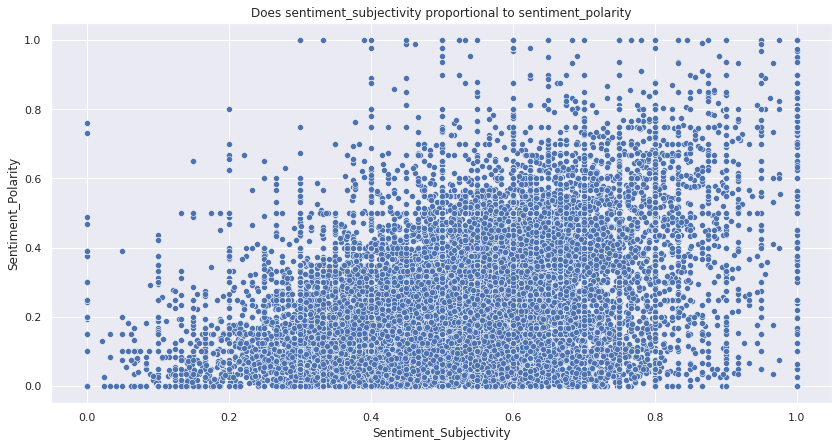

In [239]:
plt.figure(figsize=(14,7))
sns.scatterplot(merged_df['Sentiment_Subjectivity'], merged_df['Sentiment_Polarity'])
plt.title("Does sentiment_subjectivity proportional to sentiment_polarity")
plt.show()

#From the above scatter plot it can be concluded that sentiment subjectivity is not always proportional to sentiment polarity but in maximum number of cases, it shows a proportional behavior when variance is too high or low.


In [240]:
grp=google_data.groupby('Category')
x=grp['Installs'].agg(np.sum)
y=grp['Price'].agg(np.sum)
z=grp['Reviews'].agg(np.mean)


# Category vs Installs

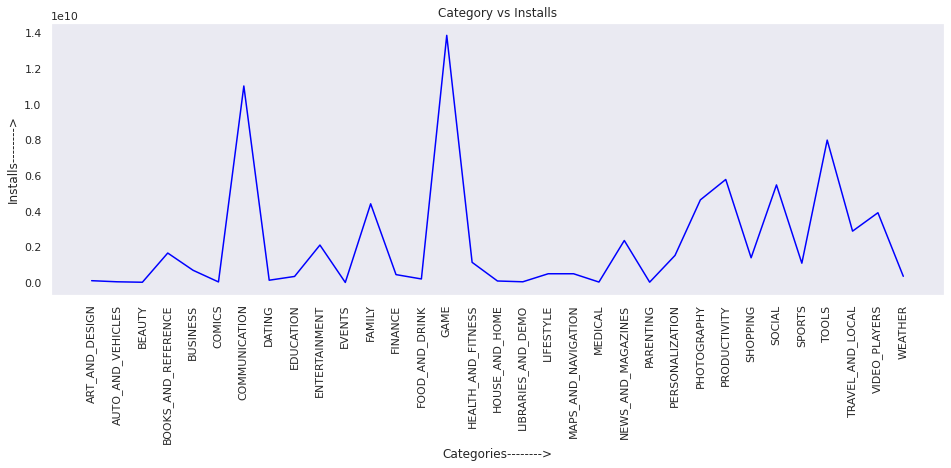

In [241]:
plt.figure(figsize=(16,5))
plt.plot(x ,  color='blue')
plt.xticks(rotation=90)
plt.title('Category vs Installs')
plt.xlabel('Categories-------->')
plt.ylabel('Installs-------->')
plt.grid()
plt.show()

# In This plot we can see that  average installs are different for different categories,Communication,Social,Photography is having highest no of installs

# Category vs Pricing

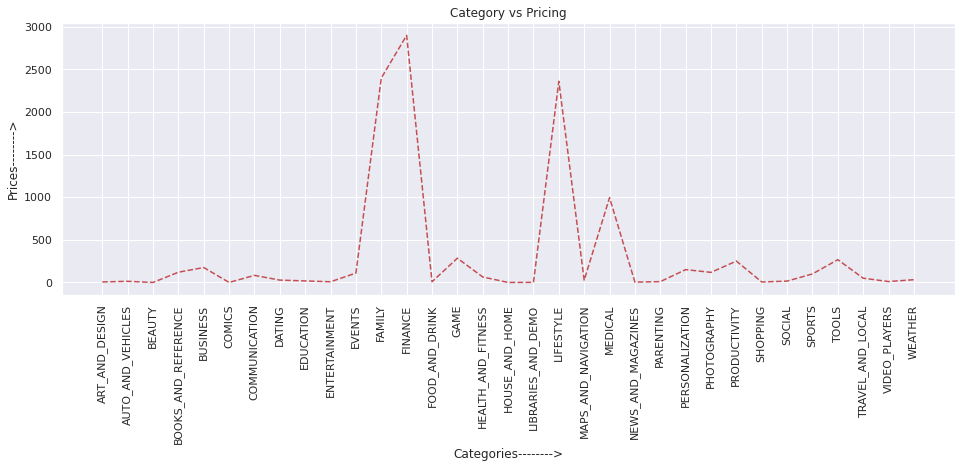

In [242]:
plt.figure(figsize=(16,5))
plt.plot(y ,'r--',  color='r')
plt.xticks(rotation=90)
plt.title('Category vs Pricing')
plt.xlabel('Categories-------->')
plt.ylabel('Prices-------->')
plt.show()

# In This plot we can see that prices are different for different Categories,Medical,Sports,Personalization is having highest prices


# Category vs Reviews

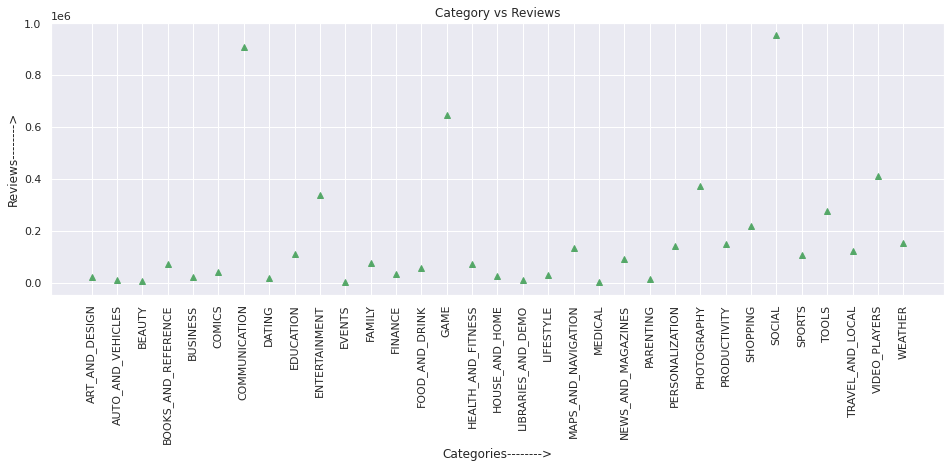

In [243]:
plt.figure(figsize=(16,5))
plt.plot(z ,'g^',  color='g')
plt.xticks(rotation=90)
plt.title('Category vs Reviews')
plt.xlabel('Categories-------->')
plt.ylabel('Reviews-------->')
plt.show()

# In This plot we can see that Reviews are different for different Categories,Social,Game,Photography is having highest Reviews

# Paid vs Free Apps

In [244]:
# Paid vs Free
def impute_type(cols):
    Type = cols[0]
       
    if Type == '0':
        return 'Free'
    
    else: 
        return Type

In [245]:
google_data['Type'] = google_data[['Type']].apply(impute_type, axis = 1)

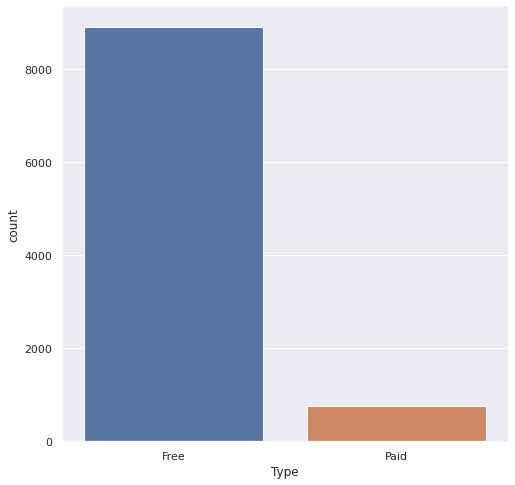

In [246]:
plt.figure(figsize=(8,8))
sns.countplot(x = 'Type', data = google_data)

# **Ratings**

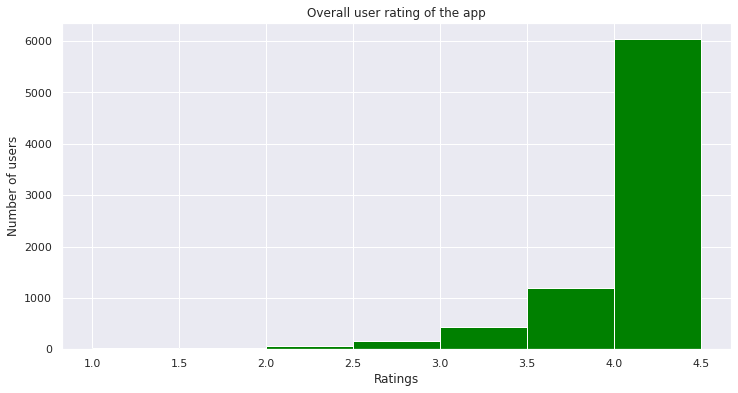

In [247]:
plt.figure(figsize=(12, 6))
plt.title('Overall user rating of the app')
plt.xlabel('Ratings')
plt.ylabel('Number of users')

plt.hist(google_data.Rating, bins=np.arange(1,5,0.5), color='green');

# It appears that large percantage of users have given the rating in range of 3.0 to 4.5.

# Top 10 Apps with highest no of installs

In [248]:
new_df=google_data[google_data['Installs']==google_data['Installs'].max()]

new=new_df.groupby('App')['Installs'].sum()
new=new.reset_index()
new=new.sort_values(by=['Installs'],ascending=False)
new_=new.head(10)

Text(0, 0.5, 'No of installs')

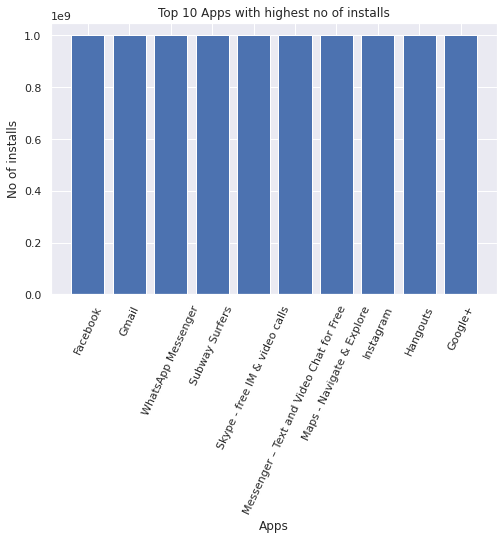

In [249]:
plt.bar(new_['App'],new_['Installs'])
plt.xticks(rotation=65)
plt.title('Top 10 Apps with highest no of installs')
plt.xlabel('Apps')
plt.ylabel('No of installs')

# Top 10 Apps with most number of reviews

In [250]:
most_no_of_reviews = google_data.groupby('App')[['Reviews']].mean().sort_values('Reviews', ascending=False).head(10)

most_no_of_reviews

,Reviews
App,
Facebook,78158306.0
WhatsApp Messenger,69119316.0
Instagram,66577313.0
Messenger – Text and Video Chat for Free,56642847.0
Clash of Clans,44891723.0
Clean Master- Space Cleaner & Antivirus,42916526.0
Subway Surfers,27722264.0
YouTube,25655305.0
"Security Master - Antivirus, VPN, AppLock, Booster",24900999.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



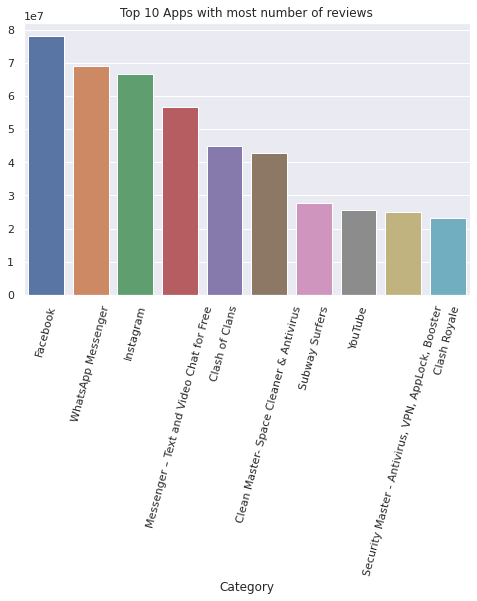

In [251]:
sns.barplot(most_no_of_reviews.index, most_no_of_reviews.Reviews)

plt.title('Top 10 Apps with most number of reviews')
plt.xticks(rotation=75);
plt.ylabel(None);
plt.xlabel('Category');

# Facebook, WhatsApp and instagram has most no of Reviews in google platy store

# What are top 10 category having highest number of installs ?



In [252]:
top_category = merged_df.Category.value_counts().reset_index().rename(columns={'Category':'Count','index':'Category'})
category_installs = merged_df.groupby(['Category'])[['Installs']].sum()
top_category_installs = pd.merge(top_category, category_installs, on='Category')
top_10_category_installs = top_category_installs[0:11]

In [253]:
top_10_category_installs

,Category,Count,Installs
0,GAME,6678,4.262736e+11
1,HEALTH_AND_FITNESS,2249,1.796420e+10
2,FAMILY,2009,2.424934e+10
3,DATING,1715,2.046310e+09
4,TRAVEL_AND_LOCAL,1692,2.973330e+10
5,SPORTS,1479,6.835990e+09
6,PRODUCTIVITY,1463,9.680830e+10
7,TOOLS,1451,1.105238e+11
8,FINANCE,1435,1.450589e+10
9,MEDICAL,1400,7.519640e+08


# Correlation Map

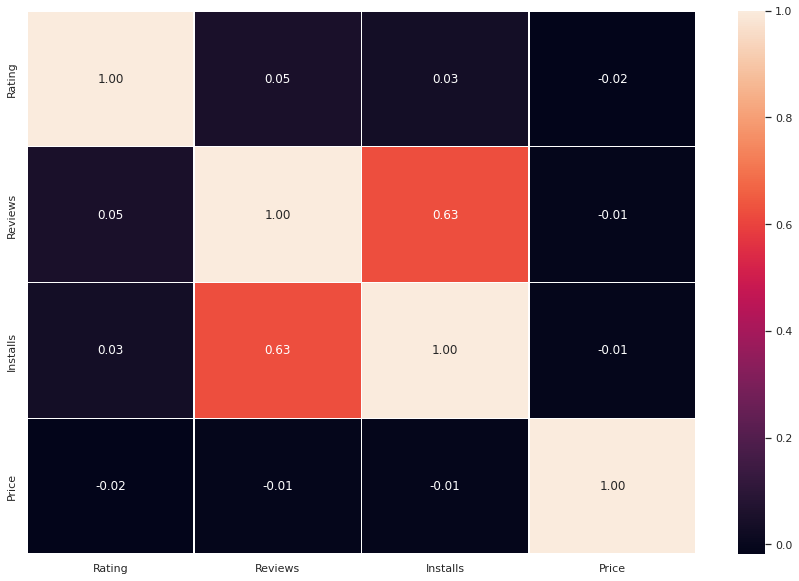

In [254]:
# Correlation map
f,ax = plt.subplots(figsize=(15,10))
sns.heatmap(google_data.corr(), annot=True, linewidths=.8, fmt= '.2f',ax=ax)
plt.show()

# We can determine from above that Installs and Reviews are Highly Positively Correlated.



# Price vs Ratings

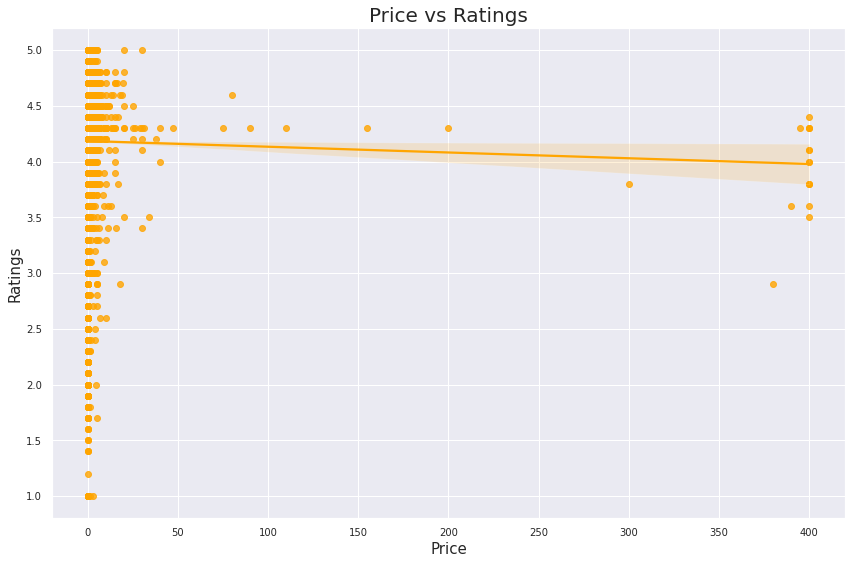

In [255]:
plt.figure(figsize=(12,8))
fig=sns.regplot(x='Price',y='Rating',data=google_data[google_data['Reviews']<1000000],color='orange')
fig.set_xlabel("Price",size=15)
fig.set_ylabel("Ratings",size=15)
plt.xticks(size=10)
plt.yticks(size=10)
plt.title('Price vs Ratings',size = 20)
plt.tight_layout()

# Generally increasing the Prices, doesn't have significant effect on Higher Rating. For Higher Price, Rating is High and almost constant ie greater than 4


# Reviews vs Ratings

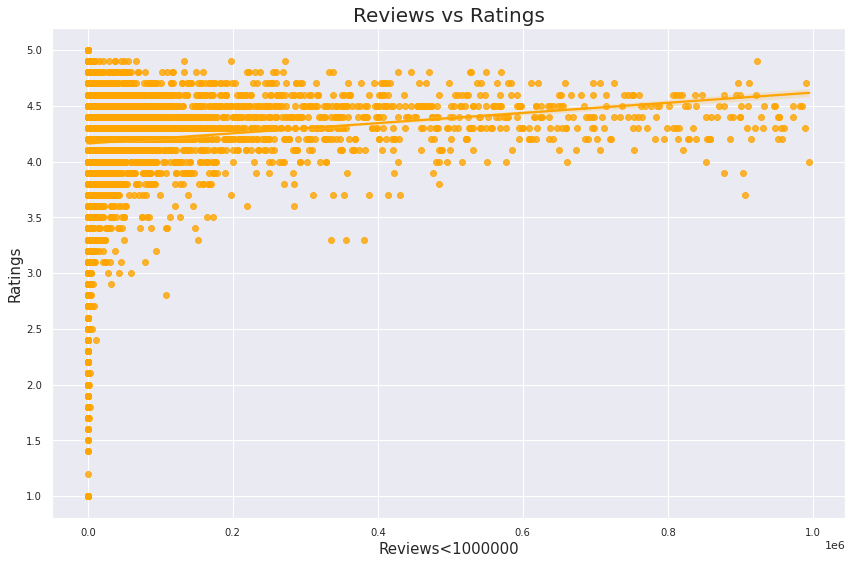

In [256]:
plt.figure(figsize=(12,8))
fig=sns.regplot(x='Reviews',y='Rating',data=google_data[google_data['Reviews']<1000000],color='orange')
fig.set_xlabel("Reviews<1000000",size=15)
fig.set_ylabel("Ratings",size=15)
plt.xticks(size=10)
plt.yticks(size=10)
plt.title('Reviews vs Ratings',size = 20)
plt.tight_layout()

# Obviously by looking at above scatter plot with trendline we are able to conclude that lesser the reviews on applications lesser the rating as well.


# Reviews vs Installs

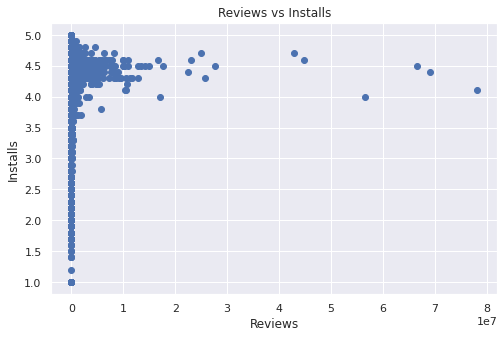

In [257]:
plt.scatter(google_data['Reviews'], google_data['Rating'])
plt.title('Reviews vs Installs')
plt.xlabel('Reviews')
plt.ylabel('Installs')
plt.show()

# Size vs Installs

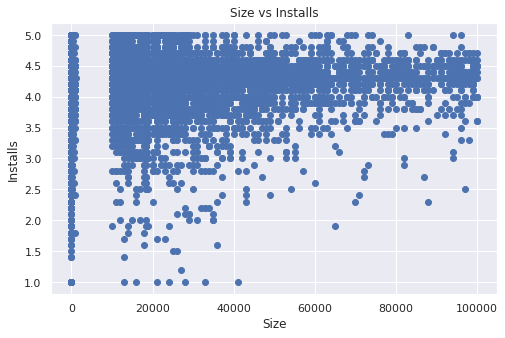

In [258]:
plt.scatter(google_data['Size'], google_data['Rating'])
plt.title('Size vs Installs')
plt.xlabel('Size')
plt.ylabel('Installs')
plt.show()

# Looks like communication apps has huge deamand

# Free vs Paid Apps

In [259]:
google_data.groupby('Type').count()

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
Type,,,,,,,,,,,,
Free,8903,8903,8903,8903,8903,8903,8903,8903,8903,8903,8903,8903
Paid,756,756,756,756,756,756,756,756,756,756,756,756


In [260]:
google_data.query("Type!='Free' & Type!='Paid' ")

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [261]:
google_data.at[8667,'Type']='Paid'
google_data.at[9990,'Type']='Free'
google_data.groupby('Type').count()

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
Type,,,,,,,,,,,,
Free,8903,8903,8903,8903,8903,8903,8903,8903,8903,8903,8903,8903
Paid,756,756,756,756,756,756,756,756,756,756,756,756


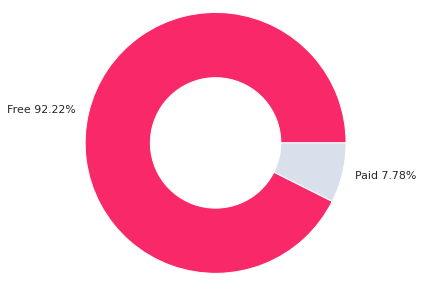

In [262]:
size_of_groups=[9592,766]

colors = ['#F92969','#D9DFEB']
mylabels = ["Free 92.22%","Paid 7.78%"]
my_pie,_ = plt.pie(size_of_groups,radius = 1.2,labels = mylabels,colors=colors)

plt.setp(my_pie, width=0.6, edgecolor='white') # 

plt.show()

# Here we can see that 92.22% apps are free and 7.78% apps are paid on Google Play Store, so we can say that Most of the apps are free on Google Play Store.

# Installs vs Rating

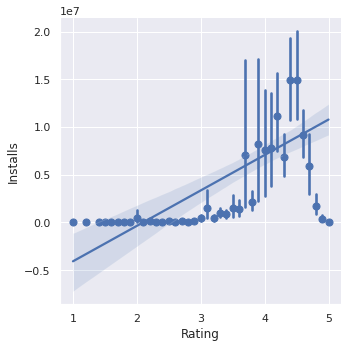

In [263]:
sns.lmplot(x='Rating',y='Installs',data=google_data,x_estimator=np.mean)

# This graph confirms that most downloads happening as rating increasesinstalls are propotional to ratings

# Number of installed Application according to content Rating

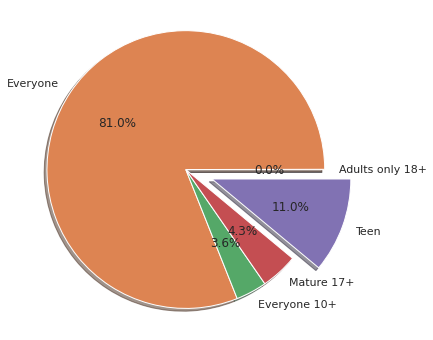

In [264]:
labels = ['Adults only 18+', 'Everyone', 'Everyone 10+' ,'Mature 17+', 'Teen']
sizes = [3 ,8382 , 373,  447 ,1143]

fig1, ax1 = plt.subplots()
fig1.set_size_inches(6,6)
myexplode = [0, 0, 0, 0,0.2]
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=0, explode = myexplode)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


plt.savefig('real.png', bbox_inches = 'tight',
    pad_inches = 0)
myexplode = [0.2, 0, 0, 0]
plt.show()


# From the graph we can say , ther are plenty of apps in playstore, every one can access and very few apps related to adults

# Most Downloaded apps in Play Store Dataset

In [265]:
pd.DatetimeIndex(merged_df['Last Updated']).year

Int64Index([2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018,
            ...
            2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018],
           dtype='int64', name='Last Updated', length=35929)

In [266]:
# Creating the column for year
google_data['Year'] =  pd.DatetimeIndex(google_data['Last Updated']).year

In [267]:
Category_df=google_data.groupby(['Category','Year']).count()
Category_df.reset_index(inplace=True)
Category_df = Category_df[['Category', 'Installs','Year']]
Category_df.head()

,Category,Installs,Year
0,ART_AND_DESIGN,12,2017.0
1,ART_AND_DESIGN,52,2018.0
2,AUTO_AND_VEHICLES,1,2014.0
3,AUTO_AND_VEHICLES,3,2016.0
4,AUTO_AND_VEHICLES,7,2017.0


In [268]:
import plotly.express as px

In [269]:
# Plotting the barplot with Installs on x-axis and Year on y-axis and grouping them with category
fig = px.bar(Category_df, x='Installs', y='Year',color='Category',orientation='h',barmode='relative',text='Installs',
             title='Most Downloaded apps in Play Store Dataset',height=500,)
fig.show()

# Family Category have high number of Application and if we move from year then we can also see the change in number of apps.